In [1]:
import yfinance as yf

In [48]:
"""
period : str
    Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
interval : str (Intraday data cannot extend last 60 days)
    Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
start: str(YYYY-MM-DD) or _datetime
end: str (YYYY-MM-DD) or _datetime
"""

my_tickers = {'ATVI': 'Activision',
              'ADS': 'Adidas',
              'GOOG': 'Alphabet',
              'MSFT': 'Microsoft',
              'AMZN': 'Amazon.com',
              'TEF': 'Telefonica'
          }

# Select requested tickers
tickers = yf.Tickers(" ".join(my_tickers.keys()))

# Obtain dataframe for all tickers
hist = tickers.history(period="6mo", interval="1d", start=None, end=None, actions=False, rounding=True) 

[*********************100%***********************]  6 of 6 completed


,Close,High,Low,Open,Volume,Change,Change_Percent,Change_Label
Date,,,,,,,,
2019-09-23,7.3001,7.3195,7.2516,7.2516,1774600.0,NaN,NaN,-1.0
2019-09-24,7.2710,7.3778,7.2516,7.3583,2062800.0,-0.0291,-0.398625,-1.0
2019-09-25,7.2904,7.3195,7.2224,7.2418,2523100.0,0.0194,0.266813,1.0
2019-09-26,7.3389,7.3583,7.2904,7.2904,1443500.0,0.0485,0.665258,1.0
2019-09-27,7.3778,7.4069,7.3195,7.3486,1772100.0,0.0389,0.530052,1.0
...,...,...,...,...,...,...,...,...
2020-03-16,4.1000,4.2400,3.7500,3.7500,3926100.0,-0.4300,-9.492274,-1.0
2020-03-17,4.8700,4.8700,4.2300,4.2500,2180200.0,0.7700,18.780488,1.0
2020-03-18,4.7000,5.1300,4.4900,4.6500,2376100.0,-0.1700,-3.490760,-1.0


Change Mean: -0.02209758064516129
Change Sum: -2.7401
Change Percent Mean: -0.33730163515878353
Change Label: -0.112


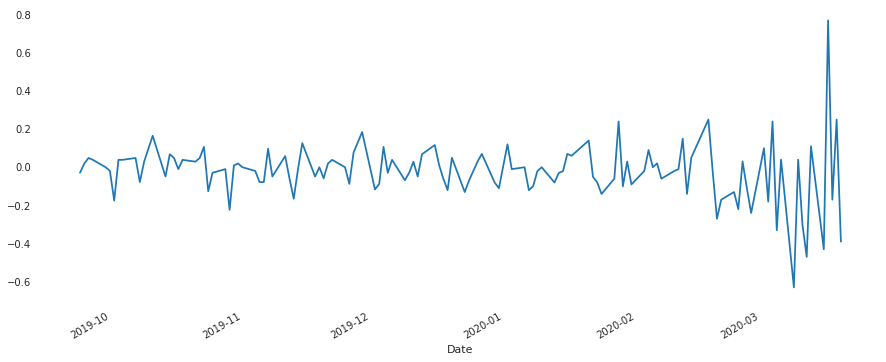

In [56]:
def set_change_label(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

# Add important data columns
for ticker in my_tickers.keys():
    hist['Change', ticker] = hist['Close', ticker].diff()
    hist['Change_Percent', ticker] = hist['Close', ticker].div(hist['Close', ticker].shift(1))*100-100
    hist['Change_Label', ticker] = hist['Change', ticker].apply(set_change_label)
    
#Select Stock
stock_label = 'TEF'
hist_one = hist.iloc[:, hist.columns.get_level_values(1)==stock_label]
#Delete level 1 column labels
hist_one = hist_one.T.reset_index(level=1, drop=True).T

display(hist_one)

display(hist_one['Change'].plot(figsize=(15,6)))

print("Change Mean:", hist_one['Change'].mean())
print("Change Sum:", hist_one['Change'].sum())
print("Change Percent Mean:", hist_one['Change_Percent'].mean())
print("Change Label:", hist_one['Change_Label'].mean())